In [1]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
img = mpimg.imread('rose.jpg')
print(img)

[[[ 56  80  67]
  [ 57  81  68]
  [ 57  81  68]
  ...
  [ 37  59  70]
  [ 38  60  71]
  [ 38  60  71]]

 [[ 56  79  69]
  [ 56  79  69]
  [ 57  80  70]
  ...
  [ 37  59  70]
  [ 38  60  71]
  [ 38  60  71]]

 [[ 53  79  68]
  [ 54  80  69]
  [ 54  80  69]
  ...
  [ 37  60  68]
  [ 38  60  71]
  [ 38  60  71]]

 ...

 [[ 23  60  52]
  [ 21  61  52]
  [ 22  62  53]
  ...
  [170 150 151]
  [170 150 151]
  [170 150 151]]

 [[ 21  61  52]
  [ 22  62  53]
  [ 22  62  53]
  ...
  [170 150 151]
  [170 150 151]
  [170 150 151]]

 [[ 22  62  53]
  [ 22  62  53]
  [ 21  63  53]
  ...
  [170 150 151]
  [170 150 151]
  [170 150 151]]]


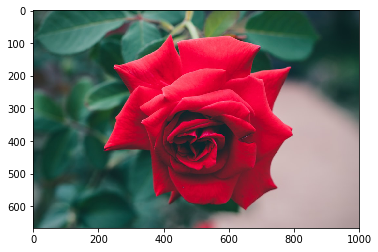

In [6]:
imgplot = plt.imshow(img)

In [7]:
img.shape

(667, 1000, 3)

In [8]:
img.dtype

dtype('uint8')

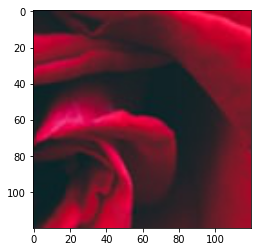

In [9]:
plt.imshow(img[320:440, 510:630], cmap=plt.cm.gray, interpolation='bilinear')   

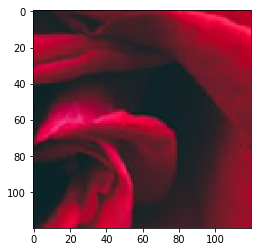

In [10]:
plt.imshow(img[320:440, 510:630], cmap=plt.cm.gray, interpolation='nearest') 

In [11]:
img[10:13,20:23]

array([[[66, 89, 83],
        [67, 90, 84],
        [68, 91, 85]],

       [[64, 89, 83],
        [67, 90, 84],
        [68, 91, 85]],

       [[65, 90, 84],
        [66, 91, 85],
        [69, 92, 86]]], dtype=uint8)

In [19]:
img.mean()

94.34768665667167

In [20]:
img.max()

255

In [23]:
img.min()

0

In [22]:
import scipy.ndimage as ndimage
lx, ly,z = img.shape
# Cropping
crop_face = img[lx // 4: - lx // 4, ly // 4: - ly // 4]
# up <-> down flip
flip_ud_face = np.flipud(img)
# rotation
rotate_face = ndimage.rotate(img, 45)
rotate_face_noreshape = ndimage.rotate(img, 45, reshape=False)

In [24]:
rotate_face

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)

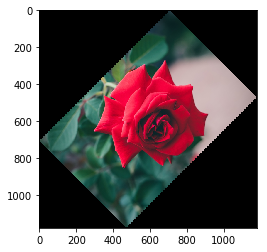

In [25]:
plt.imshow(rotate_face)

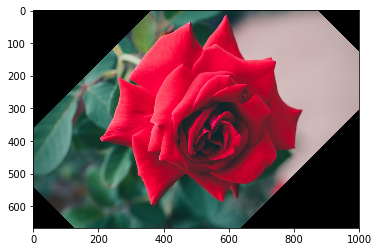

In [26]:
plt.imshow(rotate_face_noreshape)

In [29]:
blurred = ndimage.gaussian_filter(img, sigma=3)
very_blurred = ndimage.gaussian_filter(img, sigma=5)

In [30]:
blurred

array([[[ 67,  67,  67],
        [ 67,  67,  67],
        [ 67,  68,  68],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 54,  54,  54]],

       [[ 66,  67,  67],
        [ 66,  67,  67],
        [ 67,  68,  68],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  54,  54]],

       [[ 66,  67,  67],
        [ 66,  67,  67],
        [ 66,  67,  67],
        ...,
        [ 53,  53,  53],
        [ 53,  53,  53],
        [ 53,  54,  54]],

       ...,

       [[ 44,  44,  44],
        [ 44,  45,  45],
        [ 44,  45,  45],
        ...,
        [157, 156, 156],
        [157, 156, 156],
        [157, 156, 156]],

       [[ 44,  44,  44],
        [ 44,  45,  45],
        [ 45,  45,  45],
        ...,
        [157, 156, 156],
        [157, 156, 156],
        [157, 156, 156]],

       [[ 44,  44,  44],
        [ 44,  44,  44],
        [ 45,  45,  45],
        ...,
        [157, 156, 156],
        [157, 156, 156],
        [157, 156, 156]]

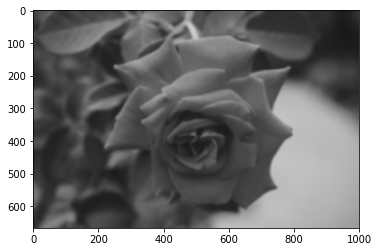

In [31]:
plt.imshow(blurred)

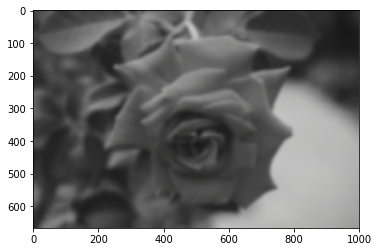

In [32]:
plt.imshow(very_blurred)

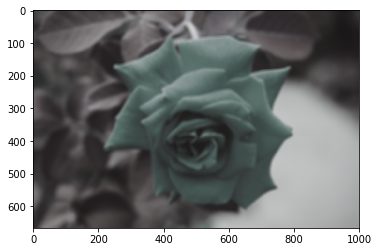

In [33]:
local_mean = ndimage.uniform_filter(img, size=11)
plt.imshow(local_mean)

In [34]:
filter_blurred_f = ndimage.gaussian_filter(blurred, 1)
alpha = 30
sharpened = blurred + alpha * (blurred - filter_blurred_f)

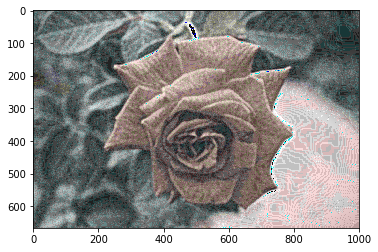

In [35]:
plt.imshow(sharpened)

In [36]:
f = img[230:290, 220:320]
noisy = f + 0.4 * f.std() * np.random.random(f.shape)

In [37]:
gauss_denoised = ndimage.gaussian_filter(img, 2)

In [38]:
med_denoised = ndimage.median_filter(img, 3)


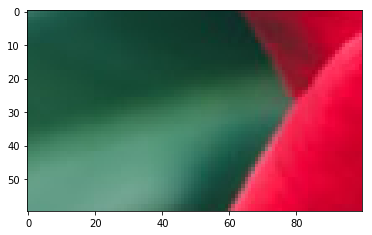

In [39]:
plt.imshow(f)

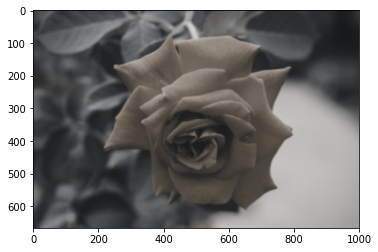

In [40]:
plt.imshow(gauss_denoised)

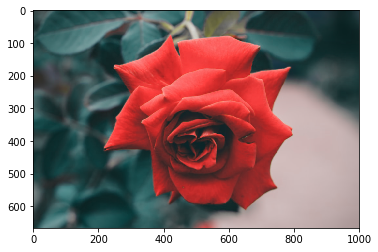

In [41]:
plt.imshow(med_denoised)

In [42]:
sx = ndimage.sobel(img, axis=0, mode='constant')
sy = ndimage.sobel(img, axis=1, mode='constant')
sob = np.hypot(sx, sy)